# TSARNN Homework 6 - Maximilian Rokuss and Julius Meyer-Ohlendorf



### **Task 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from scipy.special import factorial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1.1)**

In [ ]:
# loading data
location = "/content/drive/MyDrive/Colab Notebooks/TSARNN/TSARNN_Ex6/"
filename = "ex6file.mat"
mat = spio.loadmat(location + filename)

print('keys:', mat.keys())

keys: dict_keys(['__header__', '__version__', '__globals__', 'A', 'B', 'Gamma', 'Sigma', 'mu0', 'n0', 'u'])


In [ ]:
A = mat["A"]
B = mat["B"]
Gamma = mat["Gamma"]
Sigma = mat["Sigma"]
mu0 = mat["mu0"]
n0 = mat["n0"]
u = mat["u"]

print("A.shape", A.shape)
print("B.shape", B.shape)
print("Gamma.shape", Gamma.shape)
print("Sigma.shape", Sigma.shape)
print("mu0.shape", mu0.shape)
print("n0.shape", n0.shape)
print("u.shape", u.shape)

A.shape (2, 2)
B.shape (2, 2)
Gamma.shape (4, 2)
Sigma.shape (2, 2)
mu0.shape (2, 1)
n0.shape (4, 1)
u.shape (2, 100)


In [ ]:
# creating time series
T = 100

mu0 = np.squeeze(mu0)
n0 = np.squeeze(n0)

c_t_arr = []
z_t_arr = []

# needed to calculate log-likelihood later
lambda_t_arr = []

z_1 = np.random.multivariate_normal(mu0, Sigma)
z_t_arr.append(z_1)
 
lambda_1 = np.exp(np.log(n0) + (Gamma @ z_1))
lambda_t_arr.append(lambda_1)

c_1 = np.random.poisson(lambda_1)
c_t_arr.append(c_1)


for t in range(1, T):
  
  # latent states
  epsilon_mu = np.zeros(2)
  epsilon = np.random.multivariate_normal(epsilon_mu, Sigma)
  z_t = A @ z_t_arr[t-1] + B @ u[:, t] + epsilon
  z_t_arr.append(z_t)

  
  lambda_t = np.exp(np.log(n0) + (Gamma @ z_t))
  lambda_t_arr.append(lambda_t)
  
  # observations
  c_t = np.random.poisson(lambda_t)
  c_t_arr.append(c_t)


z_t = np.array(z_t_arr).T
c_t = np.array(c_t_arr).T
lambda_t = np.array(lambda_t_arr).T

print('z_t.shape:', z_t.shape)
print('c_t.shape:', c_t.shape)

z_t.shape: (2, 100)
c_t.shape: (4, 100)


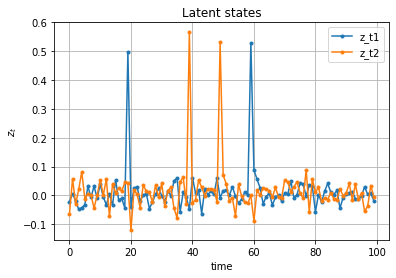

In [ ]:
plt.figure(0)
plt.title('Latent states')
plt.plot(z_t[0,:], '.-', label='z_t1')
plt.plot(z_t[1,:], '.-', label='z_t2')
plt.ylabel(r'$z_{t}$')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

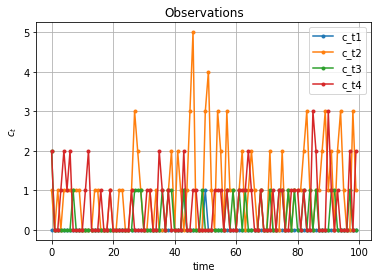

In [ ]:
plt.figure(0)
plt.title('Observations')
plt.plot(c_t[0,:], '.-', label='c_t1')
plt.plot(c_t[1,:], '.-', label='c_t2')
plt.plot(c_t[2,:], '.-', label='c_t3')
plt.plot(c_t[3,:], '.-', label='c_t4')
plt.ylabel(r'$c_{t}$')
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()

## **1.2)**

Here we calculate the joint data log-likelihood. It can be written as: <br>
\begin{equation}
log[p_{\theta}(\mathbf{c_t},\mathbf{z_t})] = log[p_{\theta}(\mathbf{c_t}|\mathbf{z_t})] + log[p_{\theta}(\mathbf{z_t})]
\end{equation}
As derived in the lecture this then results into three different terms, which come from the initial conditions, the transition model and the observed model:

In [ ]:
# calculating log-like

M = z_t.shape[0]

# term1 from initial conditions
arr_temp = z_1 - mu0
term1 = - M / 2 * np.log(2 * np.pi) - 1 / 2 * np.log(np.linalg.det(Sigma)) - 1 / 2 * (arr_temp.T @ np.linalg.inv(Sigma) @ arr_temp)

In [ ]:
# term2 from transition model

term2_1 = -(M * (T -1)) / 2 * np.log(2 * np.pi) - (T -1) / 2 * np.log(np.linalg.det(Sigma))

term2_2 = 0

for time in range(1, T):
  arr_temp = (z_t[:, time] - (A @ z_t[:, time - 1]) - (B @ u[:, t]))
  term2_2 += -1 / 2 * (arr_temp.T @ np.linalg.inv(Sigma) @ arr_temp)

term2 = term2_1 + term2_2

In [ ]:
# term3 from observed model
term3 = 0

for time in range(T):                        
  term3 += np.sum(np.log((lambda_t[:, time] / factorial(c_t[:, time])) * np.exp(-lambda_t[:, time])))

print('term1', term1)
print('term2', term2)
print('term3', term3)

log_like = term1 + term2 + term3
print('\nlog_like:', log_like)

term1 3.9443054774739514
term2 -166.59497739096378
term3 -806.3494894627801

log_like: -969.00016137627


## **Task 2**

## **2.1)**

For linear models

$$ x_t = w^t x_0 + \theta \sum_{i=0}^{t-1} w^i$$

Here we have non linear.

Fix point locally stable if slope at FP is < 1 in absolute value.

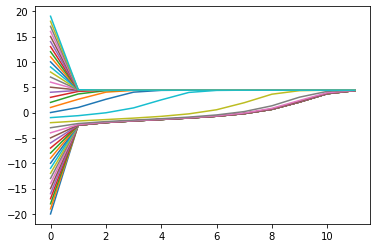

In [ ]:
### 2.1 ###

w = 7
theta = -2.5
for bc in np.arange(-20.0,20.0,1):

  N = 12
  X = np.zeros(N)
  X[0] = bc
  X[1] = w/(1+np.exp(-X[0]))+ theta

  for k in range(1,N-1):
    X[k+1] = w/(1+np.exp(-X[k]))+ theta

  plt.plot(X)
  #plt.yscale("log")

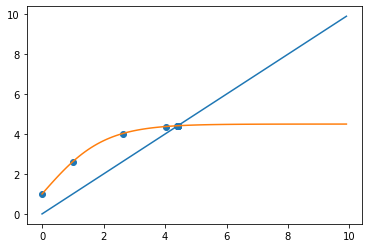

In [ ]:
N = 12
X = np.zeros(N)
X[0] = 0.0
X[1] = w/(1+np.exp(-X[0]))+ theta

for k in range(1,N-1):
  X[k+1] = w/(1+np.exp(-X[k]))+ theta

# Use 1st order return map to help determine fix points

xaxis = np.arange(0.0,10.0,0.1)
yaxis = np.arange(0.0,10.0,0.1)

plt.plot(xaxis,yaxis)
plt.plot(xaxis,w/(1+np.exp(-xaxis))+ theta)
plt.scatter(X[:-1],X[1:])
plt.show()

## **2.2)**

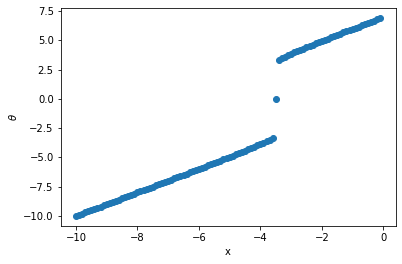

In [ ]:
### 2.2 ###

w = 7
theta_vals = np.arange(-10.0,0.0,0.1)
fix_points = []

for theta in theta_vals:
  N = 20  # Steps to convergence
  X = np.zeros(N)
  X[0] = 0.0
  X[1] = w/(1+np.exp(-X[0]))+ theta

  for k in range(1,N-1):
    X[k+1] = w/(1+np.exp(-X[k]))+ theta
  fix_points.append(X[-1])

plt.scatter(theta_vals, fix_points)
plt.xlabel("x")
plt.ylabel(r"$\theta$")
plt.show()

## **Task 3**

Discrete population Ricker model

## **3.1)**

$x = r x e^{-x}$

$\Rightarrow x = 0$ is fix point

$1 = r e^{-x} \Rightarrow x = \ln(r)$

Infinitely many fix points depending on $r$. For given $r$ two fix points $x = 0$ and $x = \ln(r)$

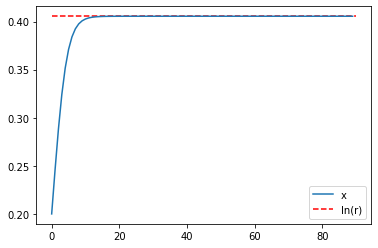

In [ ]:
### 3.1 ###
r = 1.5

N = 90
X = np.zeros(N)
X[0] = 0.2
X[1] = r*X[0]*np.exp(-X[0])

for k in range(1,N-1):
  X[k+1] = r*X[k]*np.exp(-X[k])

plt.plot(X)
plt.hlines(np.log(r),0,N,colors="red",linestyles="dashed")
lables = ["x", "ln(r)"]
plt.legend(lables)
plt.show()

## **3.2)**

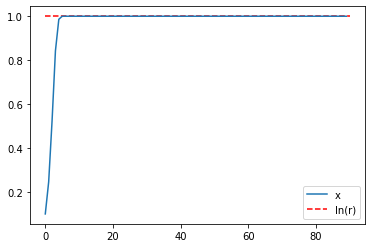

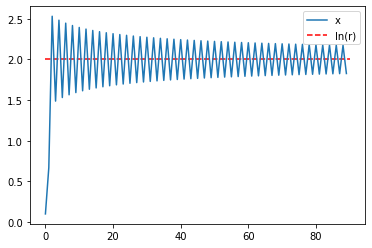

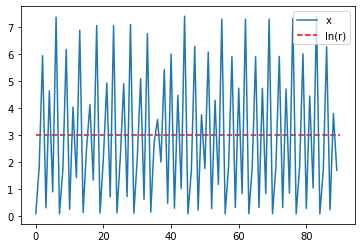

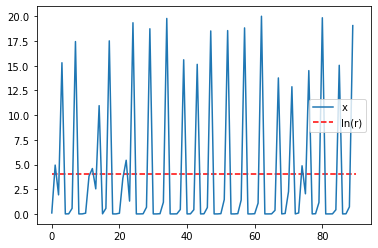

In [ ]:
### 3.2 ###

r_vals = [np.exp(1),np.exp(2),np.exp(3),np.exp(4)]

for r in r_vals:
  N = 90
  X = np.zeros(N)
  X[0] = 0.1
  X[1] = r*X[0]*np.exp(-X[0])

  for k in range(1,N-1):
    X[k+1] = r*X[k]*np.exp(-X[k])

  plt.plot(X)
  plt.hlines(np.log(r),0,N,colors="red",linestyles="dashed")
  lables = ["x", "ln(r)"]
  plt.legend(lables)
  plt.show()

One can see that eve tough we have a theoretical fix point the function does not always fully converge against it but sometimes oscillates around it, we have cycles or one observes chaotic bahaviour.